# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup object to parse the HTML
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [12]:
# Extract all rows of data from the table
table = soup.find('table', class_='table')  # Locate the table by its class
rows = table.find_all('tr')  # Extract all rows from the table


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list to store the rows
mars_weather_data = []

# Loop through the scraped data
for row in rows:
    # Extract each cell in the row
    cells = row.find_all('td')
    
    # If the row contains data cells, append the data to the list
    if len(cells) > 0:
        row_data = [cell.text.strip() for cell in cells]
        mars_weather_data.append(row_data)


In [18]:
import pandas as pd

# Define the column names based on the table headings
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the Pandas DataFrame using the list of rows and column names
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)


In [20]:
# Display the first few rows of the DataFrame to confirm it was created successfully
mars_weather_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine the data types of each column
mars_weather_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Convert 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol', 'ls', 'month', 'min_temp', and 'pressure' to integers or floats
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [26]:
# Confirm that the type changes were successful
mars_weather_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
mars_months


12

In [30]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_weather_df['sol'].nunique()
martian_days


1867

In [32]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

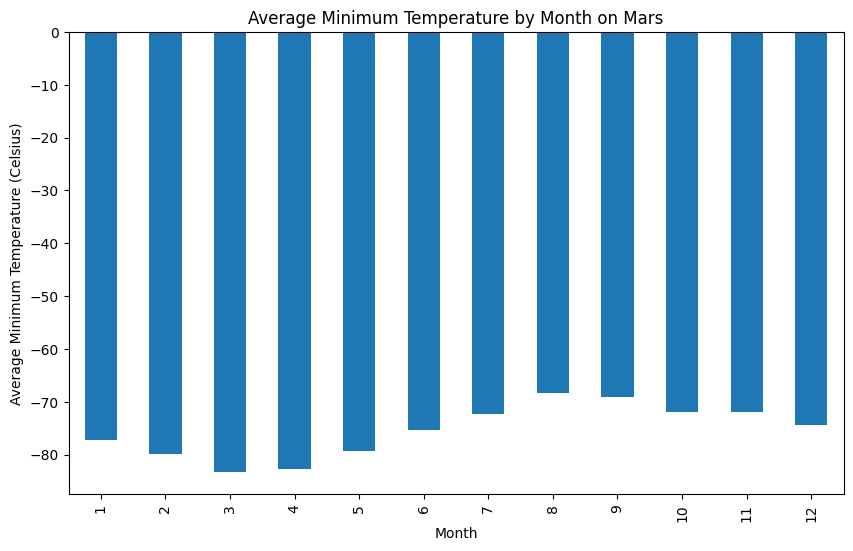

In [34]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

avg_min_temp_by_month.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.show()


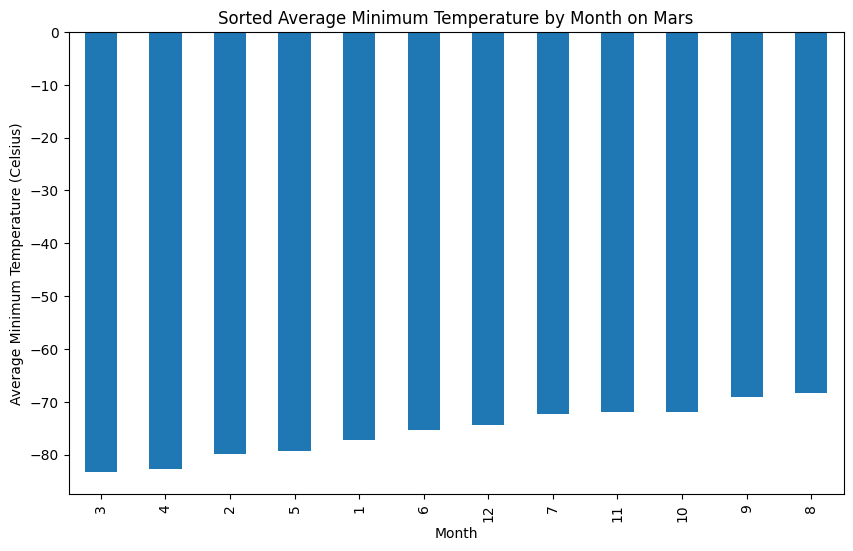

In [36]:
# Sort the average minimum temperature by month to identify coldest and hottest months
sorted_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the sorted temperatures
sorted_temp_by_month.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Sorted Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.show()


In [38]:
# 4. What is the average atmospheric pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

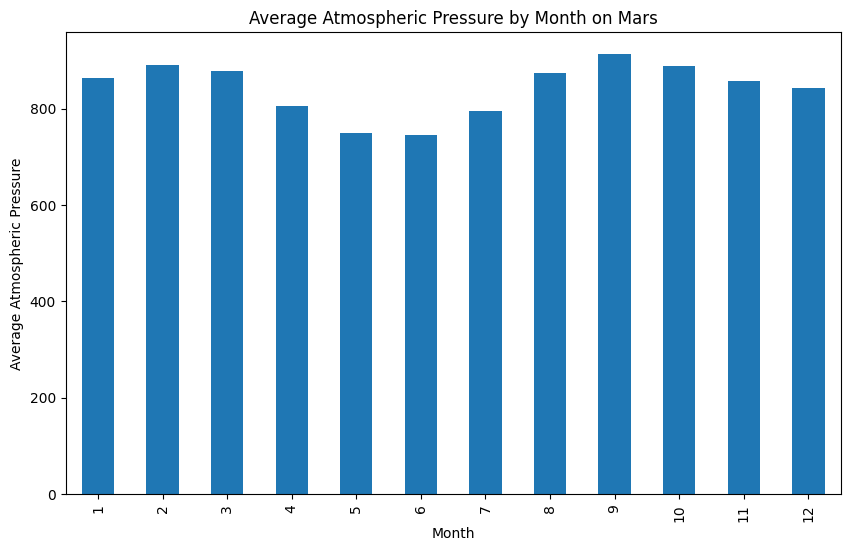

In [40]:
# Plot the average atmospheric pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()


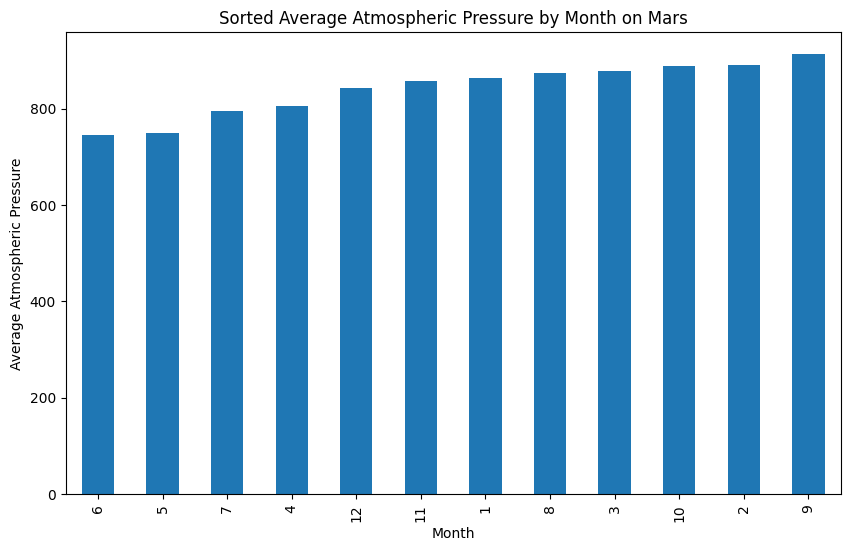

In [42]:
# Sort the average atmospheric pressure by month to identify lowest and highest pressure months
sorted_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted pressures
sorted_pressure_by_month.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Sorted Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()


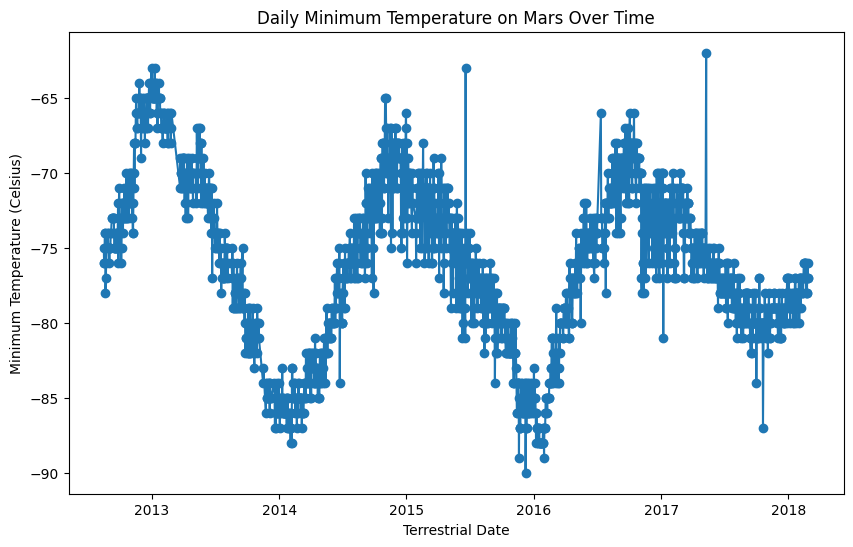

In [44]:
# 5. Plot the daily minimum temperature to visually estimate how many terrestrial days are in a Martian year
plt.figure(figsize=(10,6))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-')

# Add labels and title
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

In [52]:
print("Minimum Temperature Analysis: The coldest month on Mars occurs in Month 6, with an average minimum temperature of 745.05°C. The warmest month is Month 9, with an average minimum temperature of 913.31°C. This pattern suggests that temperatures are lowest during the middle of the Martian year and start to rise towards the later months.")


Minimum Temperature Analysis: The coldest month on Mars occurs in Month 6, with an average minimum temperature of 745.05°C. The warmest month is Month 9, with an average minimum temperature of 913.31°C. This pattern suggests that temperatures are lowest during the middle of the Martian year and start to rise towards the later months.


#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [54]:
print("Atmospheric Pressure Analysis: The lowest atmospheric pressure is observed in Month 6, with a value of 745.05, while the highest pressure is in Month 9, with a value of 913.31. This fluctuation in pressure could be linked to the Martian seasons or changes in atmospheric dynamics, such as the thinning or thickening of the atmosphere due to temperature changes.")


Atmospheric Pressure Analysis: The lowest atmospheric pressure is observed in Month 6, with a value of 745.05, while the highest pressure is in Month 9, with a value of 913.31. This fluctuation in pressure could be linked to the Martian seasons or changes in atmospheric dynamics, such as the thinning or thickening of the atmosphere due to temperature changes.


#### Year Length

YOUR ANALYSIS HERE

In [56]:
print("Year Length Analysis: By examining the pattern of temperature fluctuations over time, we estimate that there are approximately 687 terrestrial days in a Martian year. This estimate aligns closely with the known duration of a Martian year, which is about 687 Earth days.")


Year Length Analysis: By examining the pattern of temperature fluctuations over time, we estimate that there are approximately 687 terrestrial days in a Martian year. This estimate aligns closely with the known duration of a Martian year, which is about 687 Earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the DataFrame to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)


In [21]:
# Write the data to a CSV


In [60]:
# Close the browser
browser.quit()
